<a href="https://colab.research.google.com/github/ManonvanSmirren/ManonvanSmirren/blob/main-Manon-Winc/describing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Describing Data

In [15]:
!pip install matplotlib --user > /dev/null 2>&1
!pip install numpy --user > /dev/null 2>&1
!pip install pandas --user > /dev/null 2>&1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Describing a dataset is surprisingly hard. Take this (simulated) data containing total income in 1980 for each of the 100.000 inhabitans of Fooville, for example.

In [16]:
income_samples = np.round(np.hstack([np.random.normal(2.5e4, 5e3, int(7e4)),
                                     np.random.normal(5.5e4, 4e3, int(2e4)),
                                     np.random.normal(9e4, 2e3, int(1e4))]),
                          2)
income_samples[income_samples < 0] = - income_samples[income_samples < 0]
np.random.shuffle(income_samples)

pd.DataFrame(income_samples, columns=['Income'])

,Income
0,26738.07
1,57793.80
2,57248.85
3,24778.77
4,20283.78
...,...
99995,30924.47
99996,22884.03
99997,23970.93
99998,28755.99


These are 100k datapoints. It's impossible to look at them all one by one. How are we going to interpret that large bag of unsorted data?

## Mean

One measure we should take a look at is the average, the **mean** of the data. The mean is calculated like so:

1. Sum up all the values
2. Divide them by the number of datapoints

Let's apply this to our data from the inhabitants of Fooville.

In [17]:
income_samples_mean = np.mean(income_samples)
print(f'The mean income in Fooville is {income_samples_mean:.2f}')

The mean income in Fooville is 37499.21


**1. What is the mean of this list of numbers? [1, 9, 19, 100]**
Helaas kan ik alleen record 1 zien (niet 9,19 en 100), ik zal nog kijken of het me gaat lukken, maar van record 1 kan ik zien dat hij ruim boven gemiddeld is.

You, like me, might now be tempted to believe the data looks something like this.

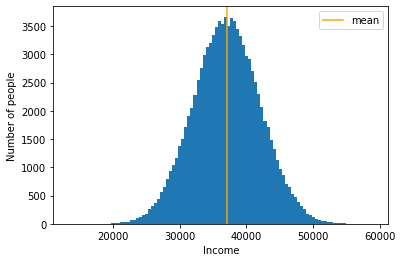

In [18]:
fig, ax = plt.subplots()
bin_vals, _, _ = ax.hist([np.random.normal(3.7e4, 5e3, int(10e4))], 100)
ax.axvline(3.7e4, label='mean', color='orange')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.legend();

## **2. Explain how we should read this plot in your own words. Discuss specifically why the edge of the plot is not smooth. Hint: it's called a histogram.**

*TODO: An histogram shows the actual number of records for a certain value

**3. Why did we choose to draw the mean as a line, and not as a dot?**

*TODO: A line is more clear in this situation, you can see easily which/how many people has an income lower/higher than the average of 37,483

**4. How realistic is it that this plot reflects the true situation, given the type of data we are looking at?**

*TODO: It is not realistic, the picture above presents (more or less) the same number of people with lower/higher income totally shadowed.These figures must be manupilated. 

Let's take a look at the *real* histogram now.

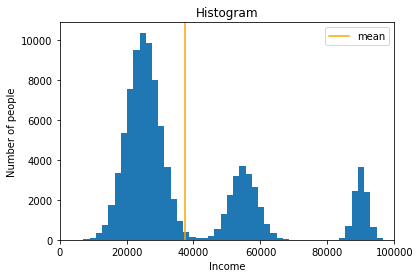

In [28]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**5. Why is the mean not located at a peak in the histogram?**

*TODO: The mean is the average of all the people. You can see in this histogram, that most of them are earning less that the average. The people with an income of 85.000 - 95.000 will upgrade the average.

**6. How can the two plots look so different, even though their mean is the same?**

*TODO: the first plot (histogram) is manupilated and therefor not useful.The second one is much better, you can see that most of the people have an income below average, then a group with income 44.000 - 66.000 and a small group with a much higher income.

**7. How much useful information does the mean give about the data here, in your opinion? Explain why.**

*TODO: the mean shows that most of the people do have a income below average.So it is useful and a clear line. It would become more useful, to show the total number of people with an income below / above average (as a numner)


## Median


An alternative measure that may be more useful is the **median**. The median is the middle value in a sorted list of all the data. Here's how to find the median:

1. Sort the data.
2. Find the middle number. If there are an even number of datapoints, take the mean of the middle two.

In [20]:
income_samples_median = np.median(income_samples)
print(f'The median income in Fooville is {income_samples_median:.2f}')

The median income in Fooville is 27823.64


Let's visualize where it is exactly on our histogram.

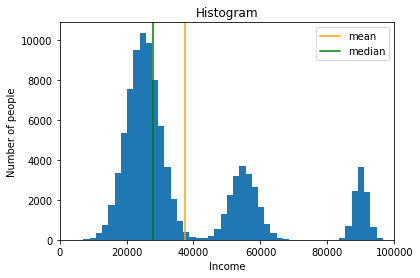

In [21]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**8. Is the median more informative about this dataset, in your opinion? Why? Consider the type of data that you're looking at.**

*TODO: When you use the 'median' it gives you a more realistic view. The exceptional highest and lowest numbers will be excluded. The most important is always, be sure what you report and describe it for the audience to prevent misunderstanding or wrong conclusions

**9. How many people in Fooville have an income below the median? How many have an income above the median?**

*TODO:  I can't read the details exactly from the histogram (I can see the details in the file itself) it's around 48.000 less then median, 52.00 higer than median

**10. Which way does the median move if we mirror the data like we did in the bottom plot below? Which way does the mean move? Finally: which one moves more? Explain your answers.** 

*TODO: The median should move to the right, as most of the people do have an higher income

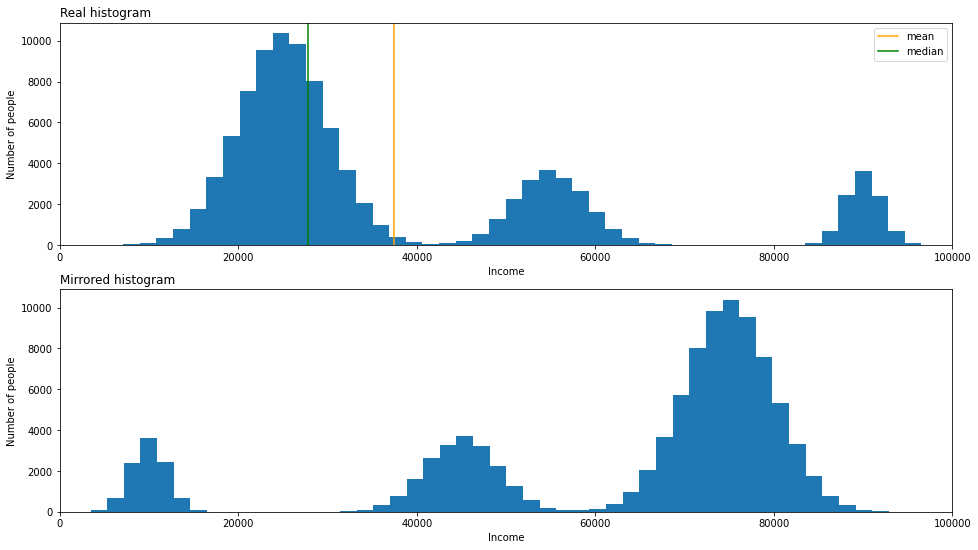

In [22]:
mirrored_income_samples = 0 - income_samples + 1e5

fig, axs = plt.subplots(2, 1, figsize=(16,9))
axs[0].set_title('Real histogram', loc='left')
axs[0].hist(income_samples, bins=50)
axs[0].axvline(income_samples_mean, color='orange', label='mean')
axs[0].axvline(income_samples_median, color='green', label='median')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Number of people')
axs[0].set_xlim([0, 1e5])
axs[0].legend();
axs[1].set_title('Mirrored histogram', loc='left')
axs[1].hist(mirrored_income_samples, bins=50)
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Number of people')
axs[1].set_xlim([0, 1e5]);

## Mode and binning

A third number that gives some information about data is distributed is the **mode**. This is the value that occurs most frequently out of all the values.

Let's count how often each number occurs in our (non-mirrored) dataset and see which one occurs most often.

The mode of the income data from Fooville is 19302.31.
It occurs 3 times.


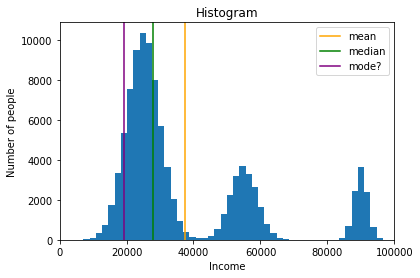

In [23]:
unique, frequency = np.unique(income_samples, return_counts = True)
income_samples_mode_freq = np.max(frequency)
income_samples_mode = unique[np.argmax(frequency)]
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')

fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode?')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

Hm! This does not match with what we learn from our histogram.

**11. What level of income would you have expected to be the mode?**

*TODO: around 27.000

**12. What is the problem that caused us to land on a strange value for the mode?**

*TODO: the mode is a peak, not the average, it's below the average

The problem that we have can be solved by *binning* the numbers in our data. Here's how that works:

1. Choose a number of *bins*. Think of these like buckets.
2. Divide the area between the minimum and maximum values of the data into smaller areas according to the number of bins.
3. Look at each datapoint and put it in the bin that it belongs to.
4. Count how many datapoints are in each bin.
5. Let each bin be represented by the middle value of the bin.

Let's do this and find the mode again.

The mode of the income data from Fooville is 24810.91.
It occurs 10370 times.


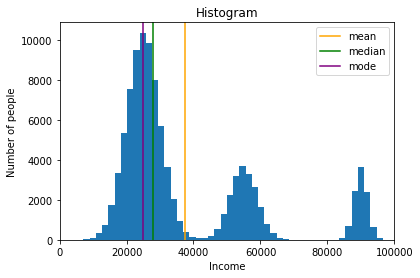

In [24]:
# PLAY AROUND WITH THIS VALUE
bins = 50
# DON'T MODIFY THE LINES BELOW

hist, bin_edges = np.histogram(income_samples, bins=bins)
income_samples_mode_freq = np.max(hist)
mode_bin_index = np.argmax(hist)
income_samples_mode = np.mean(bin_edges[mode_bin_index:mode_bin_index+2])
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=bins)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**13. How did binning solve the problem you described in your answer to question 12?**

*TODO: it is now based on the average of a more realistic part of the data

**14. Would a bin count of 3 suffice? What about 100? What is the consideration in choosing a higher or lower bin count? And what is the downside of going too far in either direction?**

*TODO: The best is to use bins which are reflecting a useful part of the data, bins who are to small are not representive and are messy in a graph*

## Quartiles and Boxplots

Finally, we will describe our data with a few extra measures:

- The min; the lowest value in the dataset.
- The max; the highest value in the dataset.
- The first quartile; the median of the lower half of the dataset. You find this value by sorting the data and selecting the middle of the lower half.
- The third quartile; the median of the upper half of the dataset. You find this value by sorting the data and selecting the middle of the upper half.

Together with the median, this is called the *five-number summary*. It is common to visualize these numbers in a type of plot that's called a *boxplot*. Here it is for the Fooville data.

The minimum is at 3387.65
The first quartile is at 23180.05
The third quartile is at 52255.28
The maximum is at 96532.26


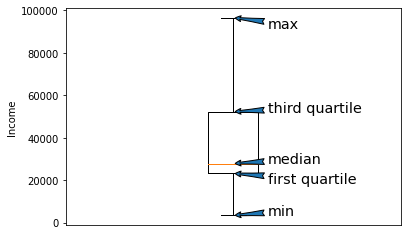

In [25]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
sorted_income_samples = np.sort(income_samples)
minimum = np.min(income_samples)
maximum = np.max(income_samples)
first_quartile = sorted_income_samples[int(sorted_income_samples.shape[0] / 4)]
third_quartile = sorted_income_samples[int(3 * sorted_income_samples.shape[0] / 4)]
ax.annotate('min', (1, minimum), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('max', (1, maximum), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('median', (1, income_samples_median), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('first quartile', (1, first_quartile), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('third quartile', (1, third_quartile), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.set_ylabel('Income')
ax.set_xticks([])

print(f'The minimum is at {minimum}')
print(f'The first quartile is at {first_quartile}')
print(f'The third quartile is at {third_quartile}')
print(f'The maximum is at {maximum}')

Here is the boxplot again without our annotations.

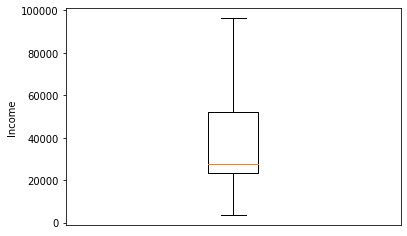

In [26]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
ax.set_ylabel('Income')
ax.set_xticks([]);

**15. How many inhabitants of Fooville have an income above the first quartile?**

*TODO: as the lines are not shown in the graphs, I can't be accurate so it's around 22.000

**16. How many inhabitants of Fooville have an income between the first and third quartile?**

*TODO: 30.000

**17. Which of the following statements are correct? (type an `x` in those boxes)**

*TODO: Fill in the right boxes.*

   - [ ] "25% of all Fooville inhabitants have an income above 20.000"
   - [ ] "50% of all Fooville inhabitants have an income between around 23.000 and around 52.000"
   - [x ] "There are no Fooville inhabitants with an income above 98.000."

**18. Does the mean always fall between the first and third quartile? Explain your answer.**

*TODO: you should expect this, however the number of records is not the same as the value of certain field in the records (in this case the income), so in theory the mean (based on value) could be in all of the quartiles

**19. Do you think a boxplot is a nice summary of the Fooville income data? Why? How does it compare to the histogram?**

*TODO: in the Boxplot, you can see the total of the inhabitants in one view, this could be more handy than the other histograms. However the histograms are more detailed.

That's it for this lesson! You now have an intuitive understanding of:

- The mean
- The median
- The mode
- Binning
- Histograms
- The minimum and maximum
- The first and third quartile
- Boxplots

Congratulations! That's a lot of material to work through.